# Build predictors dataset

In [1]:
# Names of variables to include in the dataset

local_variables = 'local_variables.csv'   # None if any local variable is to be included
cluster_variables = 'averages'            # Averages/Centroids/None
index_variables = ['ENSO_index.csv','IOD_index.csv','NAO.csv','data_CO2.csv']   # None if no index is to be included
day_oy_year = True                        # True/False          


# Path to the data files

path = './Data/Paper/'

first_year = 1950
last_year = 2022

file_name = 'predictos_dataset'     # Name of the output file

In [2]:
from build_dataset import check_consecutive_repeats,build_dataset

In [3]:
dataset = build_dataset(local_variables, cluster_variables, index_variables, day_oy_year, path, first_year, last_year,file_name)

Consecutive values repeated found at local_msl
DatetimeIndex(['1996-07-19'], dtype='datetime64[ns]', freq='D')


In [8]:
import matplotlib.pyplot as plt

(9131.0, 9845.0)

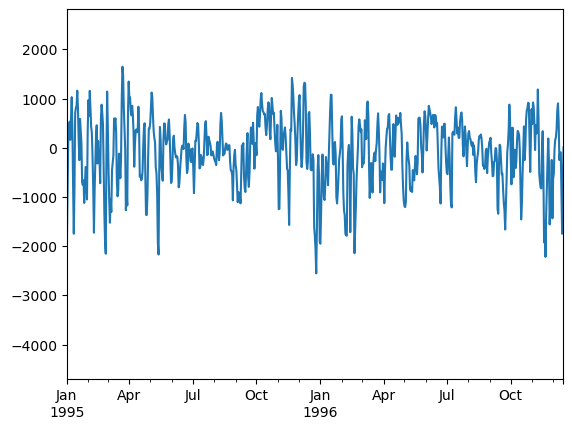

In [11]:
dataset['local_msl'].plot()
plt.xlim('1995-01-01','1996-12-15')